In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from google.colab import drive
import time
import seaborn as sns
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to save results in Google Drive
results_path = '/content/drive/My Drive/ACE6233_Assignment/Task2/'

# Create the directory if it doesn't exist
if not os.path.exists(results_path):
    os.makedirs(results_path)

# Load the dataset
url = "https://raw.githubusercontent.com/wooihaw/datasets/main/steel_faults.csv"
df = pd.read_csv(url)

# Preview the first five rows of the dataset
print("First five rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Mounted at /content/drive
First five rows of the dataset:
   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
0                    108  ...         0.4706         1.0000  

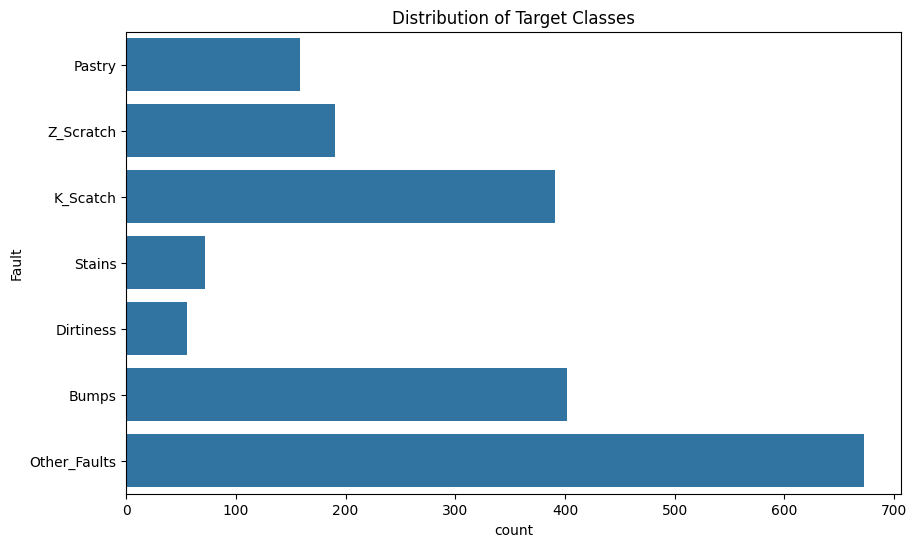

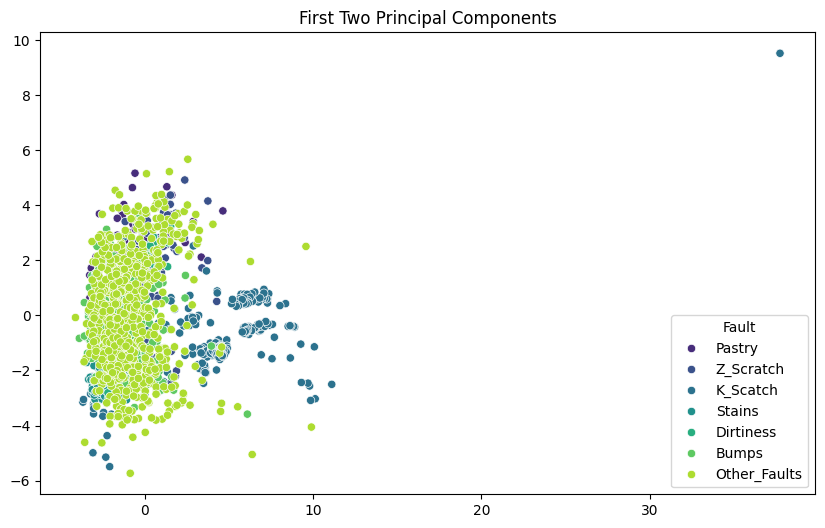

In [ ]:
# Visualize the distribution of target classes
plt.figure(figsize=(10, 6))
sns.countplot(df['Fault'])
plt.title('Distribution of Target Classes')
plt.savefig(results_path + 'target_distribution.png')
plt.show()

# Separate the dataset into features (X) and targets (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Apply standard scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the first two principal components after PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='viridis')
plt.title('First Two Principal Components')
plt.savefig(results_path + 'pca_2d_scatter.png')
plt.show()

In [ ]:
# List of classifiers
classifiers = {
    "k-NN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(random_state=42)
}

# Train and validate each classifier using 5-fold cross-validation
scores_before_pca = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
    scores_before_pca[name] = scores.mean()

# Print performance before PCA
print("\nPerformance of classifiers before PCA:")
for name, score in scores_before_pca.items():
    print(f"{name}: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Performance of classifiers before PCA:
k-NN: 0.5930
Logistic Regression: 0.6131
Gaussian Naive Bayes: 0.5631
Support Vector Machine: 0.6440
Decision Tree: 0.5462
Random Forest: 0.6167
Gradient Boosting: 0.6265
MLP Classifier: 0.6219


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Apply PCA to reduce the number of features by half
pca = PCA(n_components=X.shape[1] // 2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Train and validate each classifier on the reduced features using 5-fold cross-validation
scores_after_pca = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_pca, y, cv=5, scoring='accuracy')
    scores_after_pca[name] = scores.mean()

# Print performance after PCA
print("\nPerformance of classifiers after PCA:")
for name, score in scores_after_pca.items():
    print(f"{name}: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Performance of classifiers after PCA:
k-NN: 0.5925
Logistic Regression: 0.6198
Gaussian Naive Bayes: 0.6378
Support Vector Machine: 0.6450
Decision Tree: 0.5204
Random Forest: 0.6229
Gradient Boosting: 0.6193
MLP Classifier: 0.6198


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


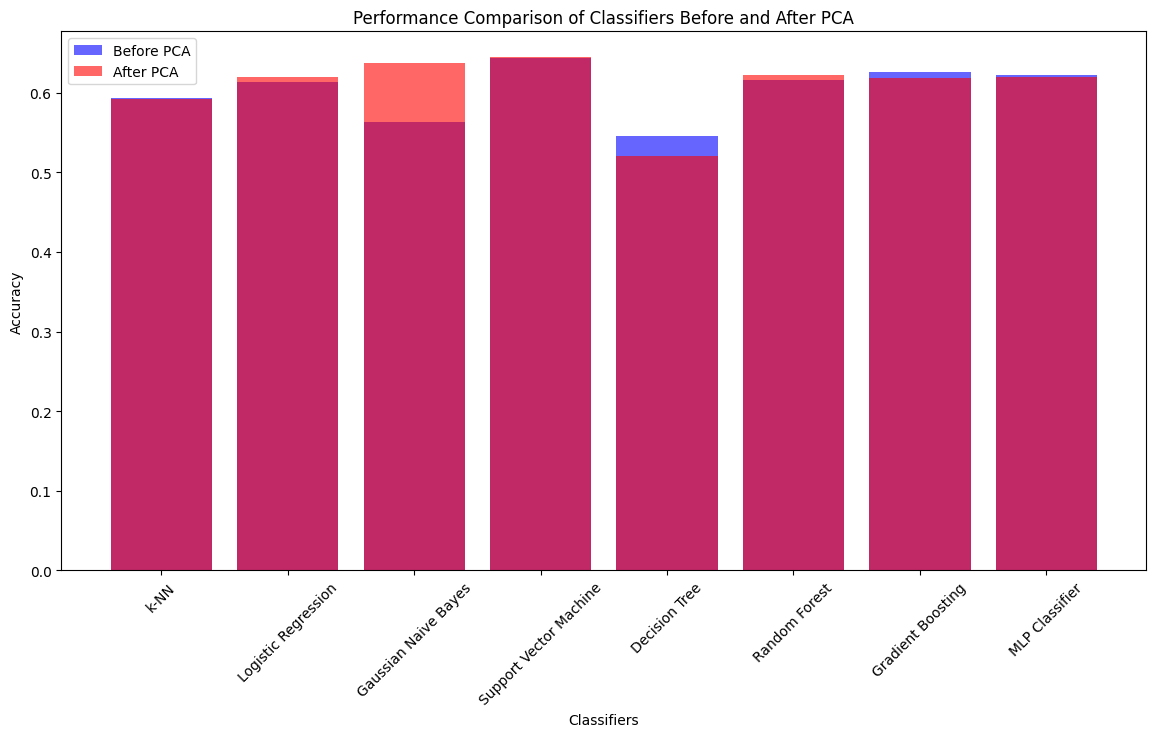

In [ ]:
# Save results to a CSV file
results_df = pd.DataFrame({
    'Classifier': scores_before_pca.keys(),
    'Before PCA': scores_before_pca.values(),
    'After PCA': scores_after_pca.values()
})
results_df.to_csv(results_path + 'classifier_performance.csv', index=False)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.bar(scores_before_pca.keys(), scores_before_pca.values(), color='b', alpha=0.6, label='Before PCA')
plt.bar(scores_after_pca.keys(), scores_after_pca.values(), color='r', alpha=0.6, label='After PCA')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Classifiers Before and After PCA')
plt.xticks(rotation=45)
plt.legend()
plt.savefig(results_path + 'performance_comparison.png')
plt.show()